# **Introdução**

O objetivo desse desafio foi contituído em dias, sendo está a primeira parte. Durante os dias 1 ao 3, faremos o traramento, exploração e um modelo de previsão para os nossos dados.

Os dados utilizado são do portal **CEAPS**. O dataset contém todos os gastos que senadores brasileiros declararam, divididos por ano. Esse tipo de dado é tão importante que já criou várias iniciativas interessantes, como a Operação Serenata de Amor, que aplica Inteligência Artificial para analisar gastos de deputados brasileiros, e que já foi capaz de identificar vários usos indevidos do dinheiro público.

# **Dia 1**

Neste primeiro dia, estaremos estudando e aplicaremos processos de tratamento e limpeza de dados ao nosso dataset.

Os dados do CEAPS contêm uma série de problemas que podem dificultar a criação de análises mais aprofundadas.

Uma das primeiras coisas que faremos é identificar tais inconsistências, como campos que possuem valores nulos ou duplicados, converter campos de data que estão sendo carregados como texto, corrigir valores monetários, nomes incorretos, formatar campos de CNPJ, etc.

Os dataset foi divido por anos que vão de 2008 até 2022, juntaremos e aplicaremos processos de limpeza nos dados. Pode-se entrar os dados na pasta `DS_Dia_1-Dia_3`.

Para este primeiro dia estaremos utilizando a biblioteca **Pandas**, que nos possibilitará transformar o dataset em um DataFrame e aplica tratamento aos dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('../DS_Dia_1-Dia_3/despesa_ceaps_2008.csv', sep=';', encoding='ISO-8859-1', skiprows=1)

for i in range(2009, 2023):
    df = pd.read_csv(f'../DS_Dia_1-Dia_3/despesa_ceaps_{i}.csv', sep=';', encoding='ISO-8859-1', skiprows=1)
    dados = pd.concat([dados, df], axis=0)

dados.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008111e+12


Como podemos ver logo acima, o DataFrame apresenta colunas com dados nulos e temos a última coluna `COD_DOCUMENTO` com valores que não conseguimos ler, provavelmente não está no formato de *string*. Vamos utilizar a função `info()` para descobrir quantas linhas nosso DataFrame tem, quantas colunas apresentam falta de valores e quais os tipos das variáveis, logo em seguida utilizaremos a função `duplicated()` e `sum()` para ver se temos linhas duplicadas.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317986 entries, 0 to 16804
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317986 non-null  int64  
 1   MES                317986 non-null  int64  
 2   SENADOR            317986 non-null  object 
 3   TIPO_DESPESA       317986 non-null  object 
 4   CNPJ_CPF           314842 non-null  object 
 5   FORNECEDOR         314842 non-null  object 
 6   DOCUMENTO          293176 non-null  object 
 7   DATA               314842 non-null  object 
 8   DETALHAMENTO       180631 non-null  object 
 9   VALOR_REEMBOLSADO  317986 non-null  object 
 10  COD_DOCUMENTO      317984 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 29.1+ MB


In [5]:
dados.duplicated().sum()

np.int64(0)

Como é possível ver, nosso dados não possui problemas com valores duplicados, mas com relação aos dados temos muita bagunça. Primeiramente temos ao todo 317986 linhas em nosso DataFrame, segundo existem várias linhas que possuem dados nulos, é possível ver pelos valores em *Non-Null* que não correspondem ao total e por último muitas linhas não estão com o seu tipo correto, como é possível ver em `COD_DOCUMENTO` que deveria ser string.

Vamos ver quantas linhas de fato são nulas utilizando as funções `isna()` e `sum()`.

In [6]:
dados.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             24810
DATA                   3144
DETALHAMENTO         137355
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             2
dtype: int64

Muitos valores nulos foram encontrados e simplesmente só aplicar a remoção dessas linhas resultaria na perda de mais de um terço do DatFrame, precisamos descobrir quais colunas são importante e retirar o resto.



In [7]:
dados['DETALHAMENTO'].unique()

array([nan,
       'BILHETE UTILIZADO PELO SENADOR ACIR GURGACZ. TRECHO: BRASÍLIA/ CUIABÁ. TAM-VOO-JJ-3648. DIA22/JUN/2011.',
       'BILHETE UTILIZADO PELO SENADOR ACIR GURGACZ. TRECHO: PORTO VELHO/BRASÍLIA. TAM-VOO-JJ-3687. DIA-27/JUN/2011.',
       ...,
       'Companhia Aérea: TAM, Localizador: THPKVQ. Passageiros: JOSÉ DA CRUZ MARINHO (Matrícula 341141, PARLAMENTAR), Voo: 3608 - BSB/BELÉM - 22/12/2022;',
       'Companhia Aérea: AZUL, Localizador: QNN9HX. Passageiros: JOSÉ DA CRUZ MARINHO (Matrícula 341141, PARLAMENTAR), Voo: 4112 - BEL/MAB - 23/12/2022;',
       'Companhia Aérea: TAM, Localizador: WMQWBX. Passageiros: YURI PEREIRA CARNEIRO AGE (Matrícula 300461, COMISSIONADO), Voo: 3608 - BSB/BELÉM - 08/01/2023; YURI PEREIRA CARNEIRO AGE (Matrícula 300461, COMISSIONADO), Voo: 3609 - BELÉM/BSB - 20/01/2023;'],
      shape=(108502,), dtype=object)

A coluna `DETALHAMENTO` tem muitos valores nulos, mas como ela só especifica como foi gasto a despesa, podemos simplesmente removê-la de nossa análise.

In [8]:
dados[dados['DOCUMENTO'].isna() == False]['DOCUMENTO'].unique()

array(['000330', '106471', '77472', ..., 'THPKVQ', 'QNN9HX', 'WMQWBX'],
      shape=(221629,), dtype=object)

A coluna `DOCUMENTO` apresenta números e letras, provavelmente refere-se ao número da nota fiscal, um recibo apresentado pelo fornecedor ou um localizador. Com isso concluímos que esta coluna não nos trás muita informação, logo será removida do nosso dataframe.

E como vamos retirar essa coluna, podemos facilmente retirar a coluna `COD_DOCUMENTO` que está ligada à coluna que vamos retirar.


Perceba que algumas linhas ficaram com valores vazios, mesmo assim não vamos dropá-las para não perder informação da coluna `VALOR_REEMBOLSADO`, para que ao analisarmos não percamos informação.

Vamos vericar as colunas `SENADOR` e a coluna `TIPO_DESPESA` para ver se não temos valores errados para elas, isto é, erro de digitação ou espaço em branco

In [9]:
print(dados['SENADOR'].unique())

['ADA MELLO' 'ADELMIR SANTANA' 'ALMEIDA LIMA' 'ALOIZIO MERCADANTE'
 'ALVARO DIAS' 'ANTONIO CARLOS JUNIOR' 'ANTÔNIO CARLOS VALADARES'
 'ARTHUR VIRGÍLIO' 'AUGUSTO BOTELHO' 'CARLOS DUNGA' 'CASILDO MALDANER'
 'CÉSAR BORGES' 'CÍCERO LUCENA' 'CRISTOVAM BUARQUE' 'DELCIDIO DO AMARAL'
 'DEMÓSTENES TORRES' 'EDUARDO AZEREDO' 'EDUARDO SUPLICY' 'EFRAIM MORAIS'
 'ELISEU RESENDE' 'EPITÁCIO CAFETEIRA' 'EXPEDITO JUNIOR' 'FÁTIMA CLEIDE'
 'FERNANDO COLLOR' 'FLÁVIO ARNS' 'FLEXA RIBEIRO' 'FRANCISCO DORNELLES'
 'GARIBALDI ALVES FILHO' 'GEOVANI BORGES' 'GERALDO MESQUITA JÚNIOR'
 'GERSON CAMATA' 'GILBERTO GOELLNER' 'GILVAM BORGES' 'GIM ARGELLO'
 'HERÁCLITO FORTES' 'IDELI SALVATTI' 'INÁCIO ARRUDA' 'JARBAS VASCONCELOS'
 'JAYME CAMPOS' 'JOÃO DURVAL' 'JOÃO PEDRO' 'JOÃO RIBEIRO' 'JOÃO TENÓRIO'
 'JOÃO VICENTE CLAUDINO' 'JOSÉ AGRIPINO' 'JOSÉ MARANHÃO' 'JOSÉ NERY'
 'JOSÉ SARNEY' 'KÁTIA ABREU' 'LEOMAR QUINTANILHA' 'LOBÃO FILHO'
 'LÚCIA VÂNIA' 'MAGNO MALTA' 'MÃO SANTA' 'MARCELO CRIVELLA'
 'MARCO ANTÔNIO COSTA' 'MARCONI

In [10]:
print(dados['TIPO_DESPESA'].unique())

['Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar'
 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes'
 'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. '
 'Divulgação da atividade parlamentar'
 'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.'
 'Passagens aéreas, aquáticas e terrestres nacionais'
 'Serviços de Segurança Privada']


Aparentemente tudo nos conformes, portanto partiremos para os tratamentos dos tipos.

Transformaremos agora os tipos das colunas, transformando a coluna `DATA` em *datetime*, a coluna `CNPJ_CPF` em *string*, a coluna `FORNECEDOR` em *string* e a coluna `SENADOR` em *string*. A coluna `TIPO_DESPESA` será deixada como está, pois tem valores fixos, ou seja, já são pré-estabelecidos antes, não há necessidade de transformar em *string*. Deixaremos para depois a coluna `VALOR_REEMBOLSADO`, porque precisa de um tratamento especial.

In [11]:
dados['DATA'] = pd.to_datetime(dados['DATA'], format='%d/%m/%Y', errors='coerce')
dados['CNPJ_CPF'] = dados['CNPJ_CPF'].astype('string')
dados['FORNECEDOR'] = dados['FORNECEDOR'].astype('string')
dados['SENADOR'] = dados['SENADOR'].astype('string')

Ao realizar o tratamento da coluna `VALOR_REEMBOLSADO`, forma encontrados alguns problemas, sendo eles que os dados estão em formato brasileiro, ou seja, o DataFrame não reconhece a pontução ",", já que está por padrão americano, vamos substituí-la por ".". Além disso, foi encontrada uma linha tal que seu valor era "1\r\n675.55", transformaremos para "1675.55" e assim podemos transfomar o tipo da coluna tornando-a em *float*. Escolhemos *float* já que mais para frente utilizaremos modelos de machine learning para lidar com previsão, e esse modelos não aceitam *decimal*, tipo utilizado para valores monetários

In [12]:
dados['VALOR_REEMBOLSADO'] = [valor.replace(',','.') for valor in dados['VALOR_REEMBOLSADO']]
dados['VALOR_REEMBOLSADO'] = dados['VALOR_REEMBOLSADO'].replace('1\r\n675.55','1675.55')
dados['VALOR_REEMBOLSADO'] = dados['VALOR_REEMBOLSADO'].astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317986 entries, 0 to 16804
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                317986 non-null  int64         
 1   MES                317986 non-null  int64         
 2   SENADOR            317986 non-null  string        
 3   TIPO_DESPESA       317986 non-null  object        
 4   CNPJ_CPF           314842 non-null  string        
 5   FORNECEDOR         314842 non-null  string        
 6   DOCUMENTO          293176 non-null  object        
 7   DATA               314819 non-null  datetime64[ns]
 8   DETALHAMENTO       180631 non-null  object        
 9   VALOR_REEMBOLSADO  317986 non-null  float64       
 10  COD_DOCUMENTO      317984 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3), string(3)
memory usage: 29.1+ MB


Aqui se encerra o Dia 1.

# **Dia 2**

Agora que já tratamos os dados, gostariamos de saber o que os dados da **CEAPS** tem a nos dizer sobre as despesas gastas de seus senadores. Muitas senadores aproveitam do dinheiro público para poder pagar muitas de suas despesas mensais, gostaríamos de saber como esse dinheiro foi sendo usado ao longo do anos. Por isso mesmo vamos fazer algumas perguntas para investigar como o nosso dinheiro anda sendo gastado.

Responderemos algumas perguntas, sendo elas:

- **Pergunta 1:** Qual foi o senador que mais declarou despesas?

- **Pergunta 2:** Quais os 7 senadores que mais gastaram e quanto isso foi do total?

- **Pergunta 3:** Quais e quantas foram as despesas gastas dos senadores que declaram mais despesas e dos que gastaram mais?

- **Pergunta 4:** O gasto aumentou ano a ano de 2008 a 2022?

- **Pergunta 5:** Qual ano cada despesa foi mais declarada?

Respoder essas perguntas ajuda-nos a ver a evolução dos gastos, sabendo o quanto cada despesas exige dos cofres públicos possibilitando uma solução para reduzir gastos desnecessários. Dessa forma poderemos ver se o dinheiro está sendo bem direcionado ou está tendo um hiperfaturamento dos gastos, além de ver como foi sua evolução anual.

Para este dia utilizaremos as seguintes bibliotecas:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Jinja2

Fora o **Pandas** que já conhecemos, o Numpy é uma biblioteca para fazer opearações matemáticas, o **Matplotlib** e o **Seaborn** são bibliotecas para a criação e estilização de gráficos, já o **Jinja2** utilizaremos para a estilização de tabelas por meio de código **CSS**.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pergunta 1:** Qual foi o senador que mais declarou despesas?

Começaremos com esta pergunta para descobrir quais os senadores que mais declaram cotas para que, mais para frente, comparemos se delcararam despesas implica diretamente em maior gasto.

Faremos isso utilizando de um gráfico de barras na horizontal, para melhor visualização.

In [14]:
maior_despesas = dados[['SENADOR', 'TIPO_DESPESA']].copy()
maior_despesas = maior_despesas.groupby('SENADOR')['TIPO_DESPESA'].value_counts().reset_index()
maior_despesas = maior_despesas.drop(columns='TIPO_DESPESA')
maior_despesas.rename(columns={'count': 'QUANTIDADE_DESPESAS'}, inplace=True)
maior_despesas = maior_despesas.groupby('SENADOR').sum()
maior_despesas = maior_despesas.sort_values(by='QUANTIDADE_DESPESAS', ascending=False).reset_index()

top_senadores = maior_despesas.head(7)

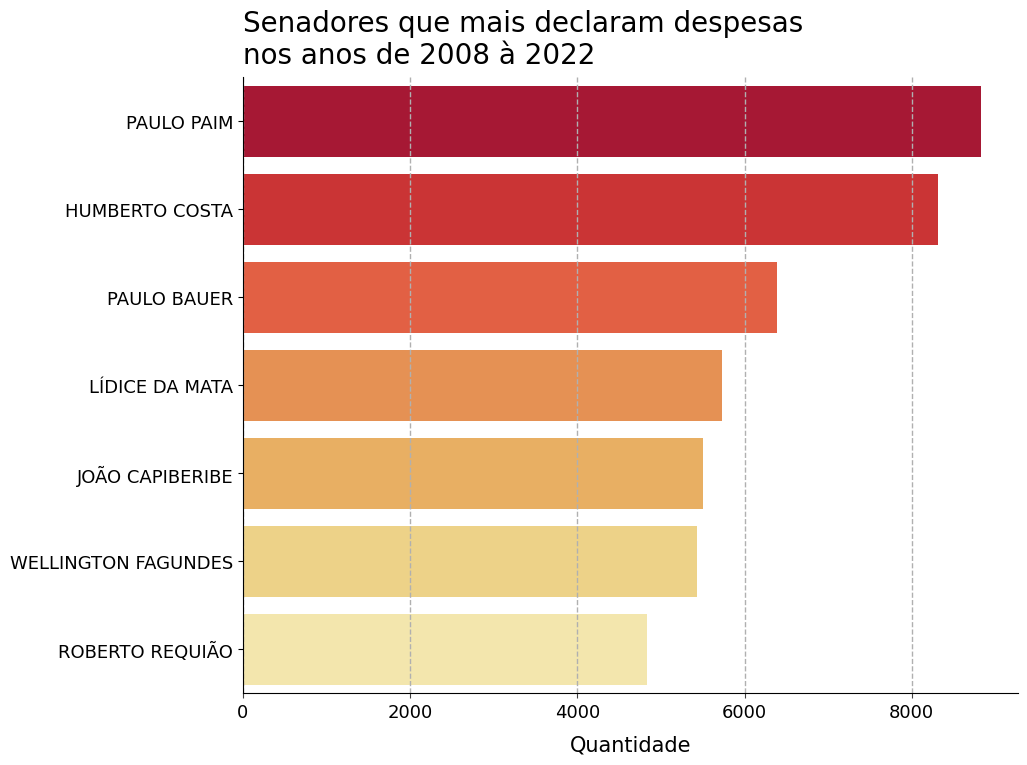

In [15]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.barplot(top_senadores, x='QUANTIDADE_DESPESAS', y='SENADOR', palette='YlOrRd_r', hue='SENADOR')
ax.set_title('Senadores que mais declaram despesas\nnos anos de 2008 à 2022', loc='left', fontsize=20, pad=10)
ax.set_xlabel('Quantidade', fontsize=15, labelpad=10)
ax.set_ylabel('')

ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_tick_params(labelsize=13, color='#414040')
ax.xaxis.grid(linestyle='--', linewidth=1)
sns.despine()

plt.show()

Disso segue que esses são os 7 senadores que mais declararam despesas. Queremos ver se esses vão aparecer no gráfico de senadores que mais gastaram dinheiro público.

## **Pergunta 2:** Quais os 7 senadores que mais gastaram e quanto foi do total?

Essa pergunta permite-nos descobrir aqueles que mais gastam e seguir diretamente para a próxima pergunta. Com isso estaremos trilhando o caminho de como esse dinheiro está saindo dos cofres públicos.

Estaremos utilizando o gráfico de barras novamente.

In [16]:
mais_gastaram = dados[['SENADOR', 'VALOR_REEMBOLSADO']].copy()
mais_gastaram = mais_gastaram.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().reset_index()
mais_gastaram = mais_gastaram.sort_values(by=['VALOR_REEMBOLSADO'], ascending=False)
mais_gastaram = mais_gastaram.head(7)

/tmp/ipykernel_943/786558126.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(labels=[0, 1, 2, 3, 4, 5, 6], fontsize=13, color='#414040')


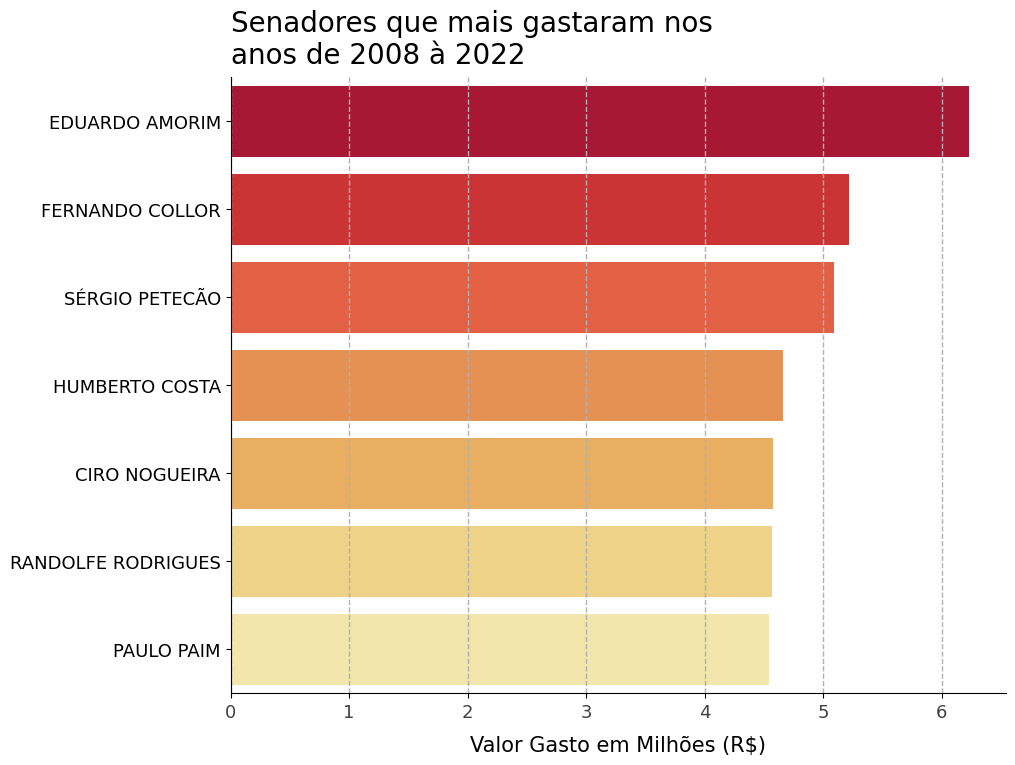

In [17]:
fig, ax = plt.subplots(figsize = (10,8))
plt.ticklabel_format(style='plain', axis='x')

ax = sns.barplot(mais_gastaram, x='VALOR_REEMBOLSADO', y='SENADOR', palette='YlOrRd_r', hue='SENADOR')
ax.set_title('Senadores que mais gastaram nos \nanos de 2008 à 2022', loc='left', fontsize=20, pad=10)
ax.set_xlabel('Valor Gasto em Milhões (R$)', fontsize=15, labelpad=10)
ax.set_ylabel('')

ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_ticklabels(labels=[0, 1, 2, 3, 4, 5, 6], fontsize=13, color='#414040')
ax.xaxis.grid(linestyle='--', linewidth=1)
sns.despine()

plt.show()

In [18]:
total = np.sum(dados['VALOR_REEMBOLSADO'])
maiores = np.sum(mais_gastaram['VALOR_REEMBOLSADO'])

porcentagem = maiores/total * 100

print(f'Os 7 que mais gastaram tomaram {porcentagem:.2f}% de todo o dinheiro gasto.')

Os 7 que mais gastaram tomaram 10.64% de todo o dinheiro gasto.


Vemos que apenas dois senadores reaparecem nesse gráfico que levanta apare suspeita do porquê isso ocorre. Vemos também que os sete que mais gastaram, tomaram 10.64% do total ao longo dos anos, o que é incrivelmente alto e absurdo o quanto desse dinheiro foi utilizado. Precisamos saber se os gastos estão de acordo com as despesas apresentadas.

## **Pergunta 3:** Quais e quantas foram as despesas gastas dos senadores que declaram mais despesas e dos que gastaram mais?

Com essa pergunta saberemos exatamente qual e quanto das despesas pode estar gerando um maior gasto.

In [19]:
cabecalho = {
    'selector': 'th',
    'props': 'font-family: DM Sans, sans-serif; font-weight:bold; text-align:left; color:#E5D8ED; background-color:#35358B;' \
            'border-bottom: 0.1rem solid #FADE5F; border-right: 0.1rem solid #FADE5F; padding: 10px'
}

corpo = {
    'selector': 'td,',
    'props': 'font-family: Roboto, sans-serif; font-weight:bold; text-align:center; color:#E5D8ED; background-color:#4C4CBB;' \
            'border-bottom: 0.1rem solid #FADE5F; border-right: 0.1rem solid #FADE5F; padding-left: 7px; padding-right: 7px;'
}

In [20]:
def quantidade_despesas(senadores):
    despesas = dados.query(f'SENADOR in {senadores}')
    despesas = despesas.groupby('SENADOR')[['SENADOR', 'TIPO_DESPESA']].value_counts().reset_index()
    despesas = pd.pivot_table(despesas, values='count', index='TIPO_DESPESA', columns='SENADOR')
    despesas = despesas.fillna(0)
    despesas = despesas.astype(int)
    despesas = despesas.style
    despesas.set_table_styles([cabecalho, corpo])
    return despesas

In [21]:
# Tabela dos senadores que mais declararam despesas
despesas = quantidade_despesas(list(top_senadores.values[:,0]))
despesas

SENADOR,HUMBERTO COSTA,JOÃO CAPIBERIBE,LÍDICE DA MATA,PAULO BAUER,PAULO PAIM,ROBERTO REQUIÃO,WELLINGTON FAGUNDES
TIPO_DESPESA,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",1068,329,1260,1075,1154,753,1048
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",341,422,623,349,407,767,186
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",214,97,118,35,494,324,83
Divulgação da atividade parlamentar,12,119,60,17,155,177,65
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",5323,3635,2560,3724,6282,2024,3473
"Passagens aéreas, aquáticas e terrestres nacionais",1344,884,1108,1183,333,768,569
Serviços de Segurança Privada,11,17,1,1,4,15,11


In [22]:
# Tabela dos senadores que mais gastaram
despesas = quantidade_despesas(list(mais_gastaram.values[:,0]))
despesas

SENADOR,CIRO NOGUEIRA,EDUARDO AMORIM,FERNANDO COLLOR,HUMBERTO COSTA,PAULO PAIM,RANDOLFE RODRIGUES,SÉRGIO PETECÃO
TIPO_DESPESA,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",12,495,36,1068,1154,869,376
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",9,202,6,341,407,63,5
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",58,63,179,214,494,244,40
Divulgação da atividade parlamentar,41,10,62,12,155,98,88
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",2073,1839,614,5323,6282,593,249
"Passagens aéreas, aquáticas e terrestres nacionais",614,806,121,1344,333,1607,550
Serviços de Segurança Privada,0,78,78,11,4,2,12


In [23]:
dados.query('SENADOR == "EDUARDO AMORIM"')[['ANO','VALOR_REEMBOLSADO']].groupby('ANO').sum()

,VALOR_REEMBOLSADO
ANO,
2011,171722.48
2012,223606.44
2013,319137.84
2014,186015.71
2015,4389954.00
2016,306258.14
2017,332653.23
2018,286636.38
2019,12810.46


In [24]:
dados.query('SENADOR == "HUMBERTO COSTA"')[['ANO','VALOR_REEMBOLSADO']].groupby('ANO').sum()

,VALOR_REEMBOLSADO
ANO,
2011,287177.26
2012,413818.47
2013,359093.18
2014,386731.86
2015,417461.82
2016,433763.14
2017,435199.20
2018,427887.25
2019,414626.71


Estranhamente ao comparar as pessoas que mais gastaram com os dois senadores que mais declararam cotas, vemos que está muito abaixo, por exemplo o senador `EDUAARDO AMORIM` em comparação aos senadores `HUMBERTO COSTA`, teve uma despesas relativamente menor que comparado a ele, ganhando apenas em *Serviçoes de Segurança Privada*. Além de vermos que em 2015 houve um grande aumento repentino nos gastos, compardo ao outro senador que permaneceu constante ao longo dos anos.

Como uma avaliação rápida, precisaremos rever no que o dinheiro está sendo gasto e reduzir os seus custo o máximo possível.

## **Pergunta 4:** O gasto aumentou ano a ano de 2008 a 2022?

Agora que já sabemos que muito dinheiro está sendo gasto, seria bom em vizualizar o quanto isso tem aumentado ao longo dos anos.

Vamos visualizar tudo com um gráfico de linhas.

In [25]:
maiores_gastos = dados[['ANO', 'VALOR_REEMBOLSADO']].copy()
maiores_gastos = maiores_gastos.groupby('ANO')['VALOR_REEMBOLSADO'].sum()
maiores_gastos = maiores_gastos.sort_index().reset_index()

maiores_gastos.head()

,ANO,VALOR_REEMBOLSADO
0,2008,11575947.40
1,2009,11731886.26
2,2010,10760010.57
3,2011,19004502.48
4,2012,23354742.37


/tmp/ipykernel_943/1510685465.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.yaxis.set_ticklabels([0, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5], fontsize=13)


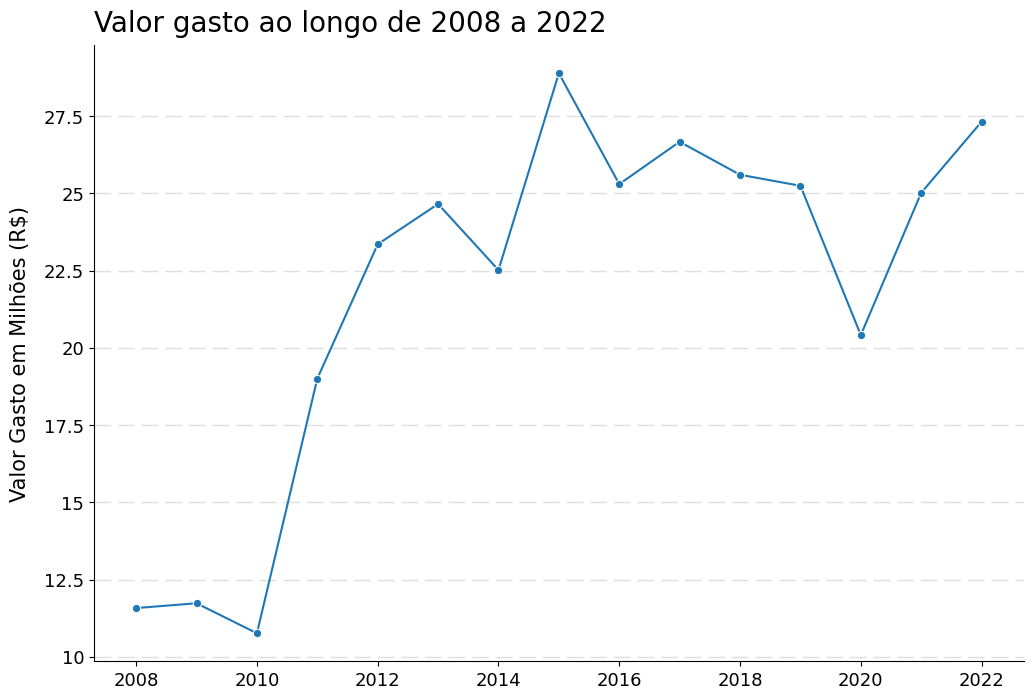

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.lineplot(maiores_gastos, x='ANO', y='VALOR_REEMBOLSADO', marker='o')
plt.ticklabel_format(style='plain', axis='y')

ax.set_title('Valor gasto ao longo de 2008 a 2022', fontsize=20, loc='left', pad=10)

ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=13)

ax.set_ylabel('Valor Gasto em Milhões (R$)', fontsize=15, labelpad=10)
ax.yaxis.set_ticklabels([0, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5], fontsize=13)
ax.yaxis.grid(linestyle=(0, (12, 5)), linewidth=1, alpha=0.4)

for i, valor in enumerate(maiores_gastos['VALOR_REEMBOLSADO']):
    None

sns.despine()

Vemos que em totalidade o valor sim aumentou de 2008 a 2022, com alguns anos que grande aumento e anos de queda.

Ao pesquisar vemos que um dos fatores que aumentou os gastos do ano de 2010 a 2011, foi a inclusão da cota de passagens aéreas (onde pode-se ver mais em [***Estados de Minas***](https://www.em.com.br/app/noticia/politica/2012/11/02/interna_politica,327062/gastos-de-senadores-ficam-nas-alturas.shtml)). Mas pela tabela feita acima, não podemos afirmar que isso foi de fato o causador principal.

Uma das grande quedas dos gastos do senado foi em 2020, ano do auge da pandemia e mesmo assim não ficou menor que vinte milhões, um valor exorbitante para uma época de isolamento total.

Por fim, analisaremos em quais anos cada cota foi mais declarada entre os senadores.

## **Pergunta 5:** Qual ano cada despesa foi mais declarada?

Essa é uma pergunta importante já que ao analisarmos os gráficos acima vemos um grande aumento no número do dinheiro utilizado. Queremos ver se vemos esse aumento das cotas está inclinada ao aumento do dinheiro utilizado.

In [27]:
tipo_maior_gasto = dados[['TIPO_DESPESA','ANO']].copy()
tipo_maior_gasto = tipo_maior_gasto.groupby(['TIPO_DESPESA'])['ANO'].value_counts().reset_index()
tipo_maior_gasto = tipo_maior_gasto.rename(columns={'count': 'QUANTIDADE_DESPESAS'})

In [28]:
tabela_despesas = pd.pivot_table(data=tipo_maior_gasto, values='QUANTIDADE_DESPESAS', index='TIPO_DESPESA', columns='ANO', aggfunc='sum', margins=True, margins_name='Total')
tabela_despesas

ANO,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",590.0,3067.0,3609.0,4150.0,5152.0,5437.0,4815.0,4883.0,5350.0,5324.0,5042.0,4107.0,4084.0,3693.0,3322.0,62625
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",484.0,1715.0,1952.0,2366.0,2378.0,2406.0,2084.0,1840.0,2024.0,1821.0,1761.0,1316.0,1216.0,1249.0,1226.0,25838
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",441.0,765.0,802.0,808.0,720.0,674.0,666.0,1151.0,971.0,987.0,928.0,981.0,1016.0,1088.0,1043.0,13041
Divulgação da atividade parlamentar,148.0,839.0,318.0,1156.0,921.0,1144.0,737.0,931.0,1083.0,1195.0,750.0,860.0,1162.0,1427.0,1038.0,13709
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",786.0,10094.0,11554.0,11938.0,13140.0,11540.0,7454.0,9649.0,10339.0,10907.0,10147.0,8553.0,4442.0,5754.0,6769.0,133066
"Passagens aéreas, aquáticas e terrestres nacionais",NaN,NaN,NaN,5080.0,7762.0,8090.0,6141.0,7463.0,6857.0,6653.0,5820.0,5795.0,2138.0,3581.0,3383.0,68763
Serviços de Segurança Privada,NaN,NaN,NaN,76.0,102.0,85.0,105.0,139.0,144.0,136.0,44.0,22.0,32.0,35.0,24.0,944
Total,2449.0,16480.0,18235.0,25574.0,30175.0,29376.0,22002.0,26056.0,26768.0,27023.0,24492.0,21634.0,14090.0,16827.0,16805.0,317986


#### Dado que foram encontrado valores nulos em alguns blocos, definiremos como sendo 0 o seu valor, uma vez que não há registros com gastos neste tipo e ano.

In [29]:
tabela_despesas = tabela_despesas.fillna(0)
tabela_despesas = tabela_despesas.astype(int)
tabela_despesas_estilizada = tabela_despesas.style
tabela_despesas_estilizada

ANO,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",590,3067,3609,4150,5152,5437,4815,4883,5350,5324,5042,4107,4084,3693,3322,62625
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",484,1715,1952,2366,2378,2406,2084,1840,2024,1821,1761,1316,1216,1249,1226,25838
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",441,765,802,808,720,674,666,1151,971,987,928,981,1016,1088,1043,13041
Divulgação da atividade parlamentar,148,839,318,1156,921,1144,737,931,1083,1195,750,860,1162,1427,1038,13709
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",786,10094,11554,11938,13140,11540,7454,9649,10339,10907,10147,8553,4442,5754,6769,133066
"Passagens aéreas, aquáticas e terrestres nacionais",0,0,0,5080,7762,8090,6141,7463,6857,6653,5820,5795,2138,3581,3383,68763
Serviços de Segurança Privada,0,0,0,76,102,85,105,139,144,136,44,22,32,35,24,944
Total,2449,16480,18235,25574,30175,29376,22002,26056,26768,27023,24492,21634,14090,16827,16805,317986


In [30]:
cabecalho = {
    'selector': 'th',
    'props': 'font-family: DM Sans, sans-serif; font-weight:bold; text-align:left; color:#E5D8ED; background-color:#35358B;' \
            'border-bottom: 0.1rem solid #FADE5F; border-right: 0.1rem solid #FADE5F; padding: 10px'
}
cabecalho_anos = {
    'selector': 'th:not(.index_name,th.row_heading)',
    'props': 'font-family: Roboto, sans-serif; text-align:center; color:#E5D8ED; background-color:#35358B;' \
            'padding-left: 7px; padding-right: 7px;'
}

corpo = {
    'selector': 'td,',
    'props': 'font-family: Roboto, sans-serif; font-weight:bold; text-align:center; color:#E5D8ED;' \
            'border-bottom: 0.1rem solid #FADE5F; border-right: 0.1rem solid #FADE5F; padding-left: 7px; padding-right: 7px;'
}

tabela_despesas_estilizada.set_table_styles([cabecalho_anos, cabecalho, corpo])
tabela_despesas_estilizada.highlight_max(color='darkred', axis=0)
tabela_despesas_estilizada.highlight_max(color='darkred', axis=1)

ANO,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",590,3067,3609,4150,5152,5437,4815,4883,5350,5324,5042,4107,4084,3693,3322,62625
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",484,1715,1952,2366,2378,2406,2084,1840,2024,1821,1761,1316,1216,1249,1226,25838
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",441,765,802,808,720,674,666,1151,971,987,928,981,1016,1088,1043,13041
Divulgação da atividade parlamentar,148,839,318,1156,921,1144,737,931,1083,1195,750,860,1162,1427,1038,13709
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",786,10094,11554,11938,13140,11540,7454,9649,10339,10907,10147,8553,4442,5754,6769,133066
"Passagens aéreas, aquáticas e terrestres nacionais",0,0,0,5080,7762,8090,6141,7463,6857,6653,5820,5795,2138,3581,3383,68763
Serviços de Segurança Privada,0,0,0,76,102,85,105,139,144,136,44,22,32,35,24,944
Total,2449,16480,18235,25574,30175,29376,22002,26056,26768,27023,24492,21634,14090,16827,16805,317986


In [31]:
def colorir_fundo(valor, indice, coluna):
    if indice == 'Total' or coluna == 'Total':
        return 'background-color:red'
    if valor == 5437 or valor == 2406 or valor == 1151 or valor == 1427 or valor == 13140 or valor == 8090 or valor == 144:
        return 'background-color: #FAA50B'
    return 'background-color:#4C4CBB;'

def escolhe_bloco(dados):
    estilo = pd.DataFrame('', index=dados.index, columns=dados.columns)
    for indice in tabela_despesas.index:
        for coluna in tabela_despesas.columns:
            estilo.loc[indice,coluna] = colorir_fundo(tabela_despesas.loc[indice, coluna], indice, coluna)
            
    return estilo

In [32]:
tabela_despesas_estilizada = tabela_despesas_estilizada.apply(escolhe_bloco, axis=None)

tabela_despesas_estilizada

ANO,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",590,3067,3609,4150,5152,5437,4815,4883,5350,5324,5042,4107,4084,3693,3322,62625
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",484,1715,1952,2366,2378,2406,2084,1840,2024,1821,1761,1316,1216,1249,1226,25838
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",441,765,802,808,720,674,666,1151,971,987,928,981,1016,1088,1043,13041
Divulgação da atividade parlamentar,148,839,318,1156,921,1144,737,931,1083,1195,750,860,1162,1427,1038,13709
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",786,10094,11554,11938,13140,11540,7454,9649,10339,10907,10147,8553,4442,5754,6769,133066
"Passagens aéreas, aquáticas e terrestres nacionais",0,0,0,5080,7762,8090,6141,7463,6857,6653,5820,5795,2138,3581,3383,68763
Serviços de Segurança Privada,0,0,0,76,102,85,105,139,144,136,44,22,32,35,24,944
Total,2449,16480,18235,25574,30175,29376,22002,26056,26768,27023,24492,21634,14090,16827,16805,317986


Vemos que 2012 e 2013 foram anos onde tivemos a maior quantidade de despesas declaradas e os anos em que a maioria das depesas foram mais declaradas. Ao comparar com o gráfico que mede o aumento dos gastos realizados, vemos uma concordância com os números, e logo após não vemos mais isso. em 2015, por exemplo, foi o ano onde o dinheiro foi mais utilizado, enquanto em 2017 teve um valor menor, mesmo tendo mais cotas declaras neste ano. Outra informação mostra que 2020, 2021 e 2022 foram os anos que menos declararam cotas desde 2010, e mesmo assim continou sendo um dos anos que mais gastaram em comparação ao mesmo período, exceto por 2020 claro.

Vemos então inconsistências entre as cotas declaras e o dinheiro utilizado. Poderiamos afirmar que foi por conta da inflação que tivemos esse aumento, mas já é contrariado só pela rápida comparação entre os senadores `EDUARDO AMORIM` e `HUMBERTO COSTA`, onde um teve picos de gastos e outro uma constância.

## **Conclusão**

Vemos que o dinheiro está sendo mal utilizado pelo senadores. Isto foi respondido pelas perguntas 3 e 5, onde comparamos senadores e vimos quantas dispesas foram declaradas ao longo dos anos. O Senado brasileiro precisa rever em como estão lindando com o gasto desenfreado, avaliado na pergunta 4, e como podemos evitar muitas despesas declaradas e valores gastos, vistos nas perguntas 1 e 2, com valores que chegam a oito mil despesas declaras e mais de seis milhões em dinheiro gasto.

Com isso, muito de nosso dinheiro pode ser poupado e redistribuídos para setores do Brasil onde carecem de investimento. Tornando o Brasil um país sustentável ao longo das gerações.

# **Dia 3**

No desafio de hoje, criaremos o nosso próprio modelo de previsão!

Criaremos um modelo que irá prever quanto os senadores vão utilizar do dinheiro público para os próximos 3 meses. Utilizaremos o Prophet, um modelo estatístico de previsão de séries temporais criada pela Meta para previsão de séries temporais baseado em um modelo aditivo, no qual tendências não lineares são ajustadas com sazonalidade anual, semanal e diária, além de efeitos de feriados. Ele funciona melhor com séries temporais que apresentam fortes efeitos sazonais e dados históricos de várias temporadas. O Prophet é robusto a dados faltantes e mudanças na tendência, e geralmente lida bem com valores discrepantes.

O Prophet assume que uma série temporal pode ser decomposta em:

*𝑦(𝑡) = tendência + sazonalidades + feriados + erro*

Como o Prophet se ajuda mais com séries mais lonogas, ajuntaremos 5 anos seguidos, de 2018 à 2022, e faremos a nossa previsão do quanto os senadores irão reembolsar nos próximos meses.

Para este dia utilizaremos as seguintes bibliotecas:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-Learn
- Prophet

Fora o restante, estaremos utilizando a biblioteca Scikit-Learn para a avaliação do nosso modelo do Prophet, com métricas sendo o **RMSE** (raiz do erro médio quadrático) e o **MAPE** (média do erro porcentual absoluto), para a avalição de quanto o valor distancia da média e qual o porcentagem do valor real o modelo erra, em média, por previsão.

In [33]:
from prophet import Prophet

/home/luizh/Python/7DaysOfCode/Ciência de Dados/Atividade_Dia_1-Dia_3/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Antes de aplicarmos nosso modelo, faremos uma breve visualização de como foi o comportamento dos gastos ao longo de cada ano, entre 2018 e 2022

In [34]:
gasto = dados.query('DATA >= 2018 & DATA < 2023')[['DATA', 'VALOR_REEMBOLSADO']].copy()
gasto = gasto.groupby(['DATA']).sum().reset_index()
gasto.head()

,DATA,VALOR_REEMBOLSADO
0,2018-01-01,22029.23
1,2018-01-02,147829.22
2,2018-01-03,81326.50
3,2018-01-04,34913.92
4,2018-01-05,83382.90


Para a visualização do gráfico com relação ao tempo, diviremos o DataFrame em cinco partes para melhor visualização

In [35]:
gasto_2018 = gasto.query('DATA < 2019').reset_index()
gasto_2019 = gasto.query('DATA >= 2019 & DATA < 2020').reset_index()
gasto_2020 = gasto.query('DATA >= 2020 & DATA < 2021').reset_index()
gasto_2021 = gasto.query('DATA >= 2021 & DATA < 2022').reset_index()
gasto_2022 = gasto.query('DATA >= 2022').reset_index()

/tmp/ipykernel_943/4161094855.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(labels=[0, 0, 50, 100, 150, 200, 250, 300, 350], fontsize=13)
/tmp/ipykernel_943/4161094855.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(labels=[0, 0, 50, 100, 150, 200, 250, 300], fontsize=13)
/tmp/ipykernel_943/4161094855.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_yticklabels(labels=[0, 0, 100, 200, 300, 400], fontsize=13)
/tmp/ipykernel_943/4161094855.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_yticklabels(labels=[0, 0, 100, 200, 300, 400], fontsize=13)
/tmp/ipykernel_943/4161094855.

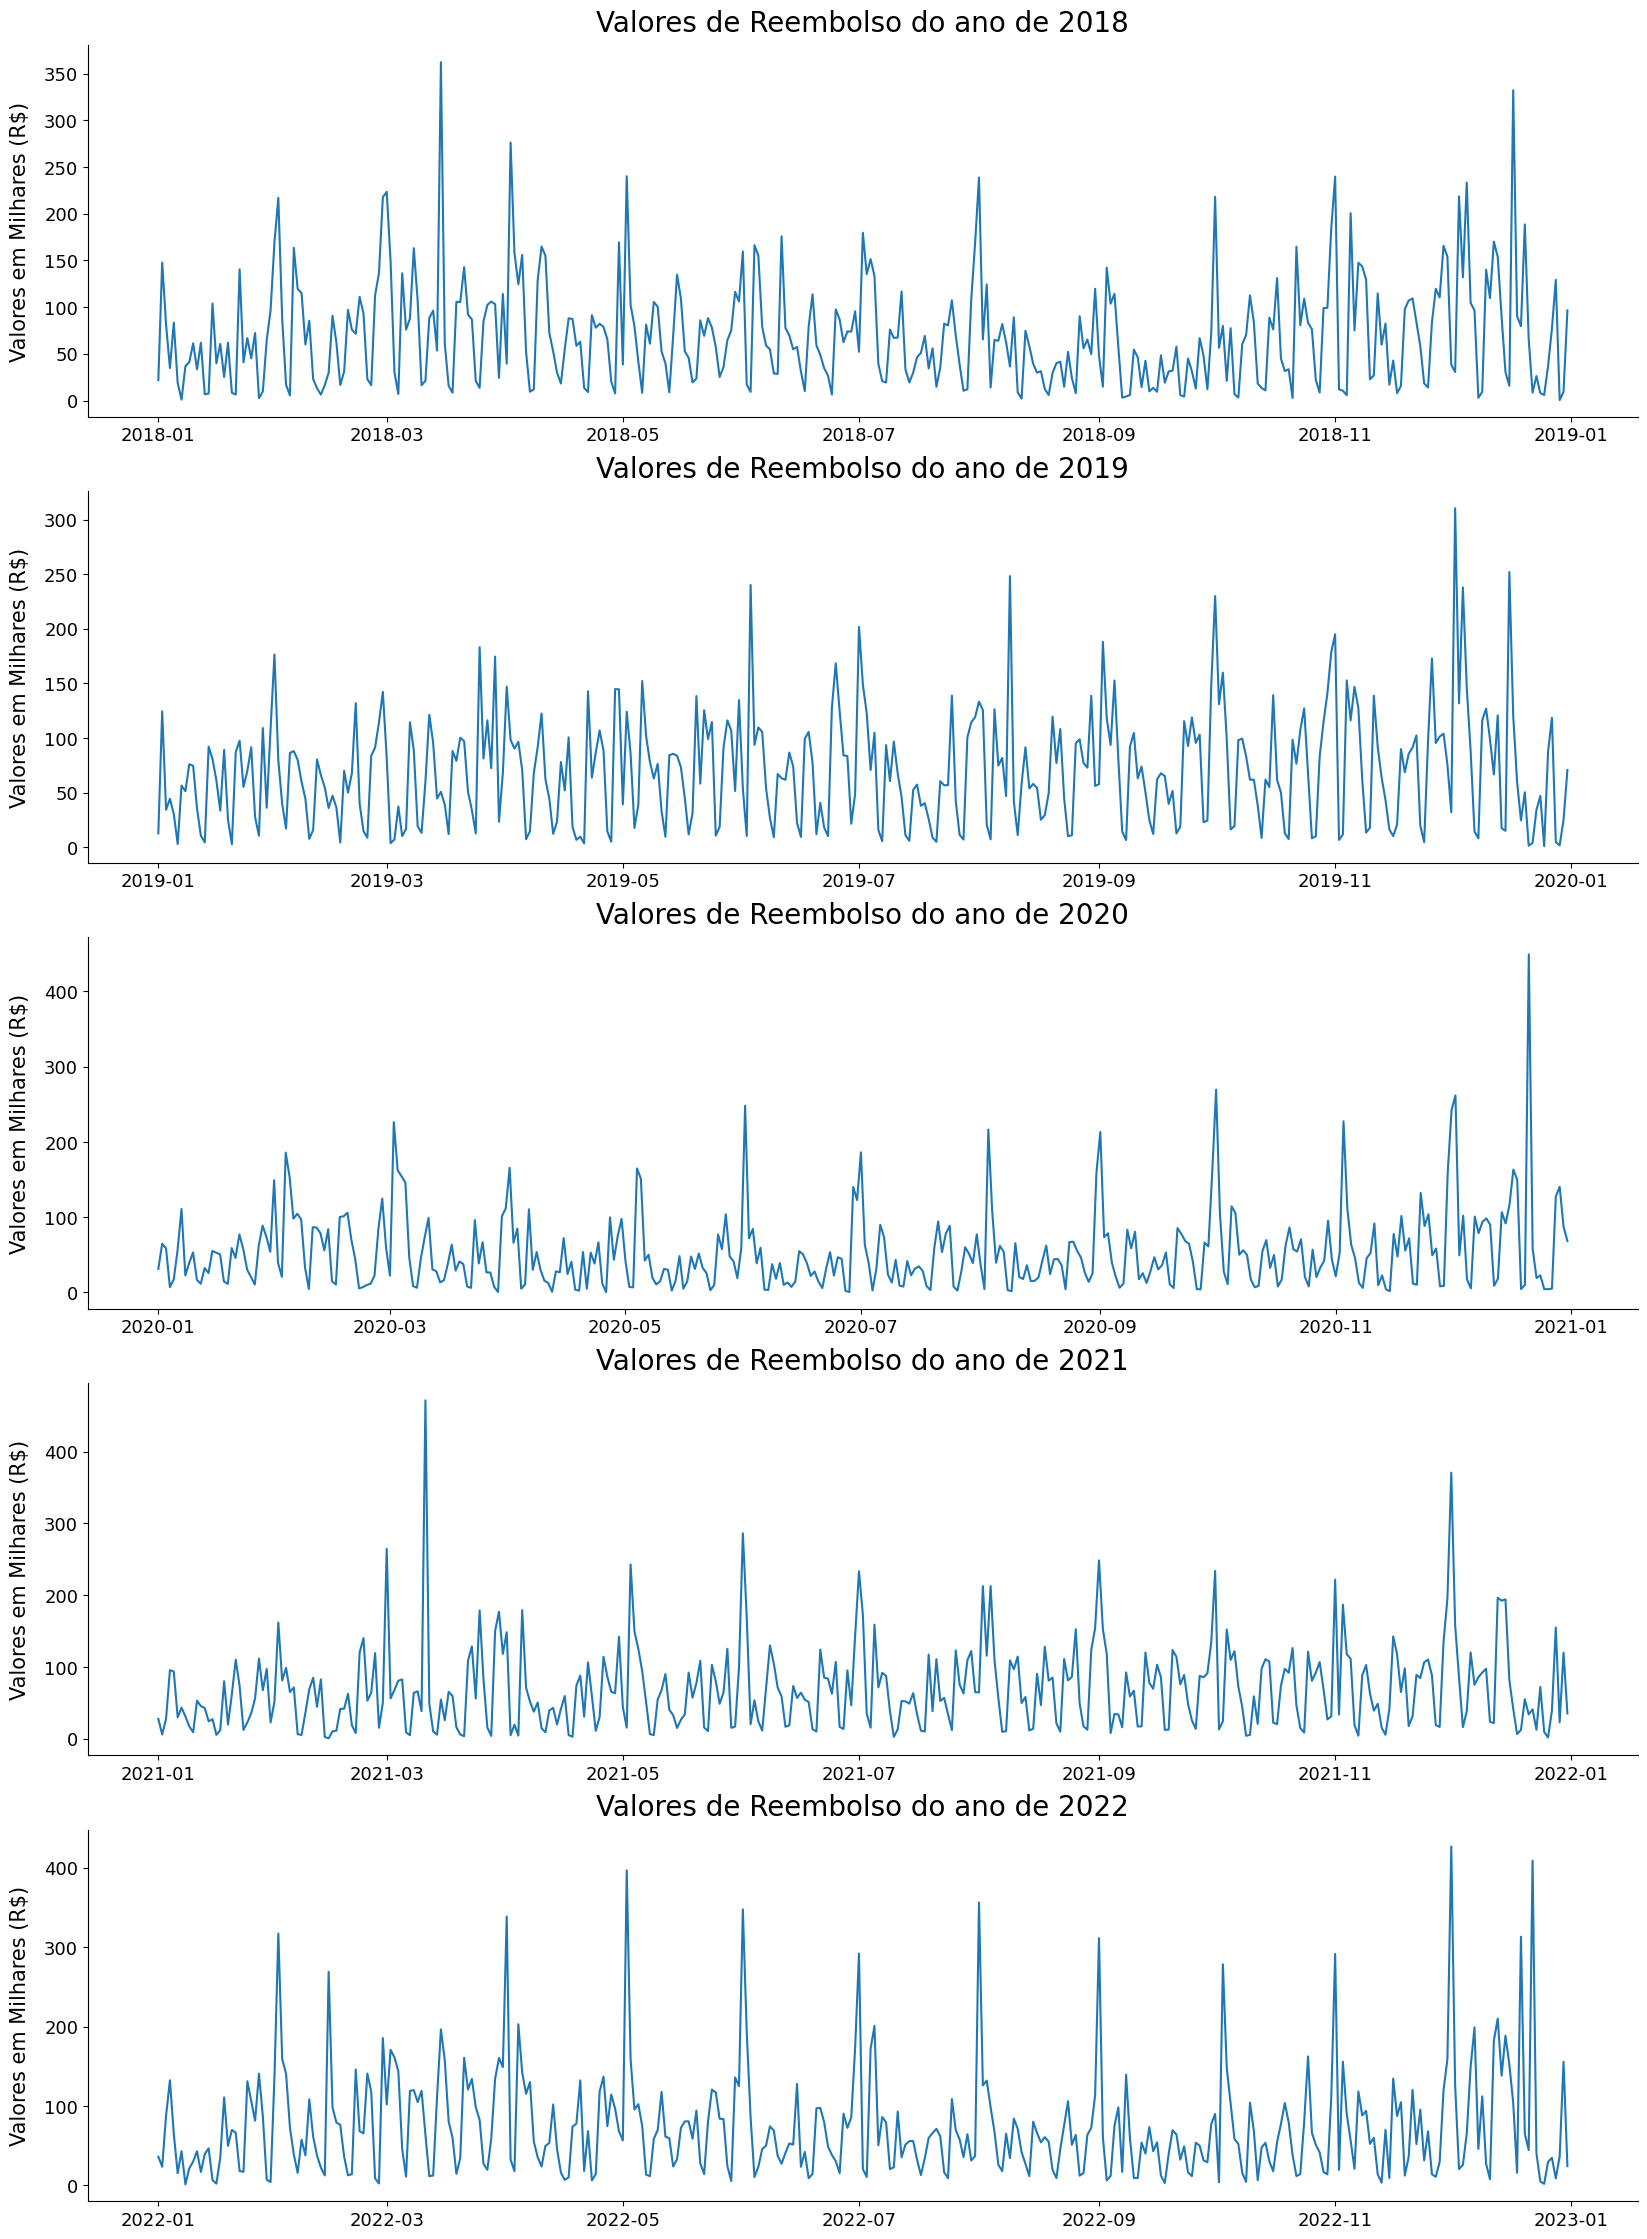

In [36]:
fig, ax = plt.subplots(5, 1, figsize=(20,28))

sns.lineplot(gasto_2018, x='DATA', y='VALOR_REEMBOLSADO', ax=ax[0])
ax[0].set_title('Valores de Reembolso do ano de 2018', fontsize=20, pad=10)
ax[0].set_ylabel('Valores em Milhares (R$)', fontsize=15, labelpad=10)
ax[0].set_yticklabels(labels=[0, 0, 50, 100, 150, 200, 250, 300, 350], fontsize=13)
ax[0].set_xlabel('')
ax[0].xaxis.set_tick_params(labelsize=13)

sns.lineplot(gasto_2019, x='DATA', y='VALOR_REEMBOLSADO', ax=ax[1])
ax[1].set_title('Valores de Reembolso do ano de 2019', fontsize=20, pad=10)
ax[1].set_ylabel('Valores em Milhares (R$)', fontsize=15, labelpad=10)
ax[1].set_yticklabels(labels=[0, 0, 50, 100, 150, 200, 250, 300], fontsize=13)
ax[1].set_xlabel('')
ax[1].xaxis.set_tick_params(labelsize=13)

sns.lineplot(gasto_2020, x='DATA', y='VALOR_REEMBOLSADO', ax=ax[2])
ax[2].set_title('Valores de Reembolso do ano de 2020', fontsize=20, pad=10)
ax[2].set_ylabel('Valores em Milhares (R$)', fontsize=15, labelpad=10)
ax[2].set_yticklabels(labels=[0, 0, 100, 200, 300, 400], fontsize=13)
ax[2].set_xlabel('')
ax[2].xaxis.set_tick_params(labelsize=13)

sns.lineplot(gasto_2021, x='DATA', y='VALOR_REEMBOLSADO', ax=ax[3])
ax[3].set_title('Valores de Reembolso do ano de 2021', fontsize=20, pad=10)
ax[3].set_ylabel('Valores em Milhares (R$)', fontsize=15, labelpad=10)
ax[3].yaxis.set_tick_params(labelsize=13)
ax[3].set_yticklabels(labels=[0, 0, 100, 200, 300, 400], fontsize=13)
ax[3].set_xlabel('')
ax[3].xaxis.set_tick_params(labelsize=13)

sns.lineplot(gasto_2022, x='DATA', y='VALOR_REEMBOLSADO', ax=ax[4])
ax[4].set_title('Valores de Reembolso do ano de 2022', fontsize=20, pad=10)
ax[4].set_ylabel('Valores em Milhares (R$)', fontsize=15, labelpad=10)
ax[4].yaxis.set_tick_params(labelsize=13)
ax[4].set_yticklabels(labels=[0, 0, 100, 200, 300, 400], fontsize=13)
ax[4].set_xlabel('')
ax[4].xaxis.set_tick_params(labelsize=13)


sns.despine()

Vemos então dias com grande picos de gastos e pouca sazionalidade, sendo mais visível apenas no final de cada ano. Possivelmente o modelo Prophet terá problemas para fazer sua previsão.

Com isso estamos prontos para criar nosso primeiro modelo.

Faremos uma separação entre treino e teste, com treino estando entre os anos de 2018 e 2021, enquanto o teste será para o ano de 2022. Além do mais, para esse primeiros testes, faremos uma previsão de 365 dias ao invés de 90.

In [37]:
np.random.seed(400)

modelo_prophet = Prophet(yearly_seasonality=True, growth='flat', seasonality_prior_scale=0.1)

df_prophet = pd.DataFrame({'ds': gasto['DATA'], 'y': gasto['VALOR_REEMBOLSADO']})

In [38]:
len(df_prophet)*0.8

1460.8000000000002

In [39]:
treino = df_prophet.copy()
teste = df_prophet.copy()

treino['ds'] = treino['ds'][:1461]
treino['y'] = treino['y'][:1461]
treino = treino.dropna()

teste['ds'] = teste['ds'][1461:]
teste['y'] = teste['y'][1461:]
teste = teste.dropna()

In [40]:
modelo_prophet.fit(treino)

futuro = modelo_prophet.make_future_dataframe(periods=365, freq='D')

previsao = modelo_prophet.predict(futuro)

16:42:45 - cmdstanpy - INFO - Chain [1] start processing
16:42:45 - cmdstanpy - INFO - Chain [1] done processing


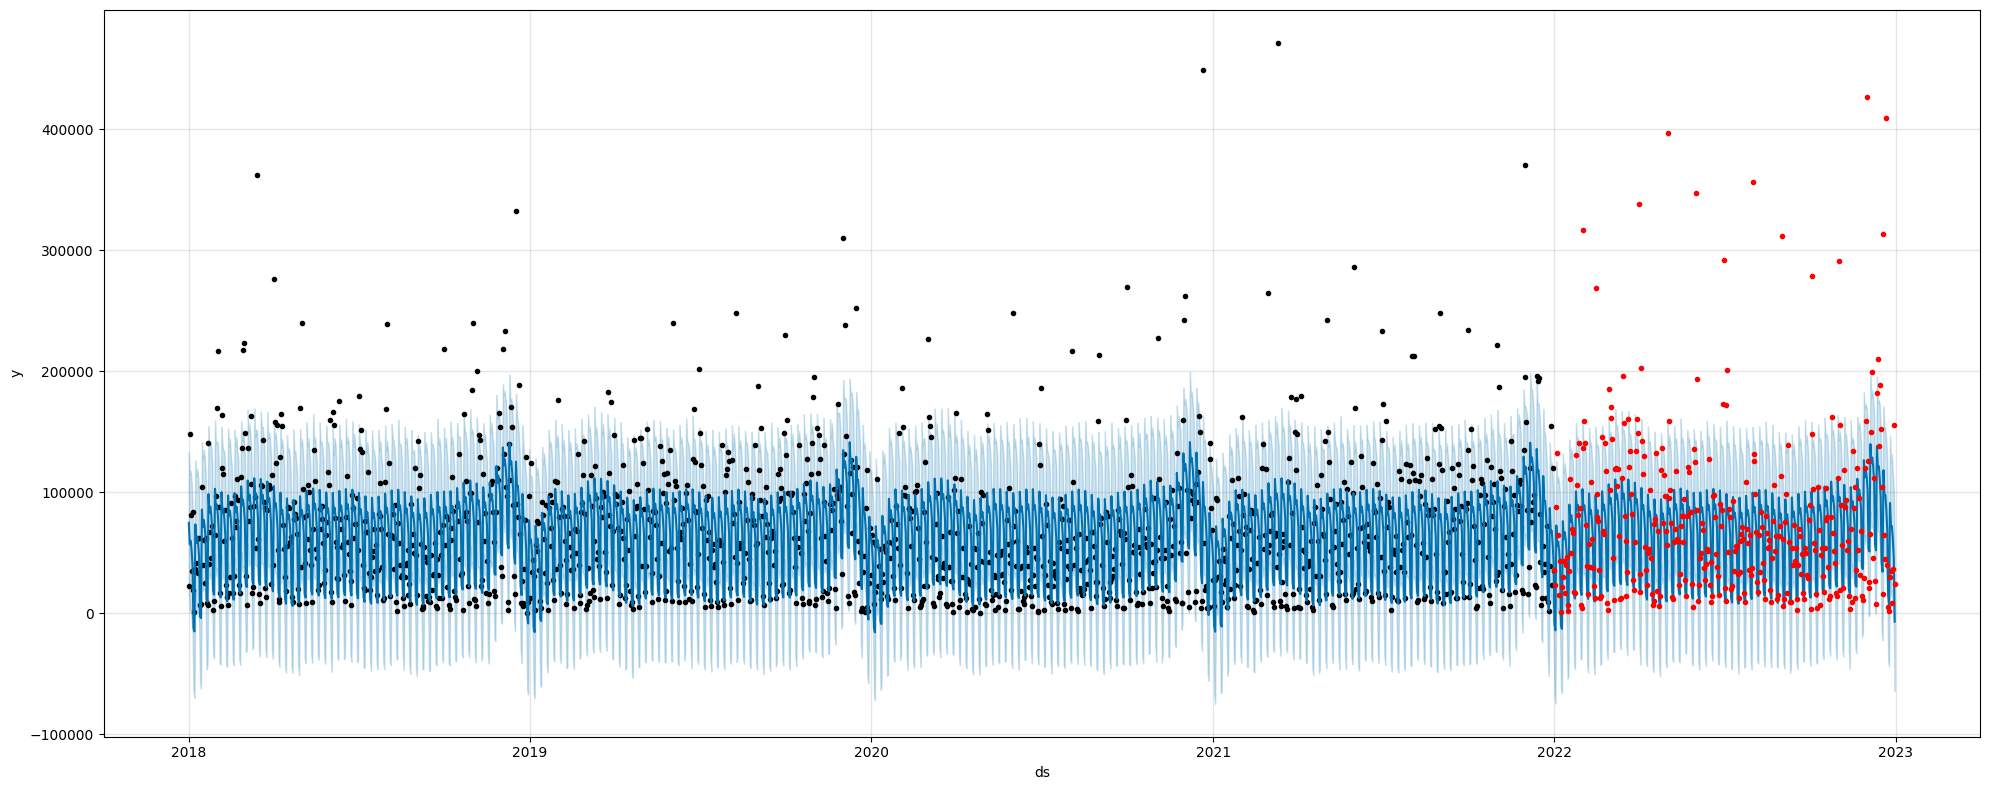

In [41]:
modelo_prophet.plot(previsao, figsize=(20,8))
plt.plot(teste['ds'], teste['y'], '.r')

Vemos que temos muitos outliers no nosso conjunto de dados, vamosp ara uma breve análise do nosso atual resultado, faremos uma medição com o **RMSE** e o **MAPE**, assim saberemos quais os próximos passos.

In [42]:
previsao_antes = previsao.copy()

previsao_antes = previsao_antes.query(' ds < "2022-01-01"')

In [43]:
valor_real_antes = treino.copy()

valor_real_antes = valor_real_antes.query('ds < "2022-01-01"')

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print('RMSE: ', np.sqrt(mean_squared_error(valor_real_antes['y'],previsao_antes['yhat'])))
print('MAPE: ', mean_absolute_percentage_error(valor_real_antes['y'],previsao_antes['yhat']))

RMSE:  43465.276972627515
MAPE:  1.035636280495744


Como primeiro resultado, nosso modelo para os dados de treino não se adaptaram muito bem, devido que apesar do **RMSE** só errar 43,5 mil reais da média, o **MAPE** teve 104% de erro absoluto com relação a média.

In [45]:
previsao_2022 = previsao.copy()

previsao_2022 = previsao_2022.query('ds >= "2022-01-01"')

In [46]:
print('RMSE: ', np.sqrt(mean_squared_error(teste['y'],previsao_2022['yhat'])))
print('MAPE: ', mean_absolute_percentage_error(teste['y'],previsao_2022['yhat']))

RMSE:  58244.283299031435
MAPE:  0.7059444644292063


Já para nosso dados de teste, tivemos o oposto. Nosso **RMSE** erra 58,2 mil reais da média, enquanto o **MAPE** tem 70% de erro absoluto.

Queremos minimizar o erro cometido. Como temos dados que ultrapassam 100 mil reais em valor gasto, seria bom um **RMSE** menor que 10 mil reais. Já para o **MAPE**, modelos que ultrapassam 30% já são considerados ruins.

Queremos então uma diminuição, para isso faremos alguns tratamentos nos dados. Faremos então a retirada dos outliers que apareceram no gráfico acima, além de que, muito dos problemas se dão também ao fato dos dados estarem em uma escala muito grande, aplicaremos o ***log(x)***, já que não possuímos valores 0, para diminuir a escala e modelo se adaptar melhor aos dados.

In [ ]:
# Retirando os outliers

sem_outliers = df_prophet[(df_prophet['y'] < previsao['yhat_upper']) & (df_prophet['y'] > previsao['yhat_lower'])]

In [48]:
sem_outliers[1249:].head()

,ds,y
1460,2021-12-31,35219.41
1461,2022-01-01,35906.26
1462,2022-01-02,23383.75
1463,2022-01-03,87695.02
1465,2022-01-05,64597.65


In [ ]:
# Separando em treino e teste e aplicando o log(x)

treino_sem_outliers = sem_outliers.copy()
treino_sem_outliers['ds'] = treino_sem_outliers['ds'][:1249]
treino_sem_outliers['y'] = treino_sem_outliers['y'][:1249]
treino_sem_outliers = treino_sem_outliers.dropna()

treino_sem_outliers['y'] = np.log(treino_sem_outliers['y'])

teste_sem_outliers = sem_outliers.copy()
teste_sem_outliers['ds'] = teste_sem_outliers['ds'][1249:]
teste_sem_outliers['y'] = teste_sem_outliers['y'][1249:]
teste_sem_outliers = teste_sem_outliers.dropna()

teste_sem_outliers['y'] = np.log(teste_sem_outliers['y'])

In [50]:
np.random.seed(400)

modelo_prophet = Prophet(yearly_seasonality=True, growth='flat', seasonality_prior_scale=0.1)

modelo_prophet.fit(treino_sem_outliers)

futuro = modelo_prophet.make_future_dataframe(periods=365, freq='D')

previsao_sem_outliers = modelo_prophet.predict(futuro)

16:42:46 - cmdstanpy - INFO - Chain [1] start processing
16:42:46 - cmdstanpy - INFO - Chain [1] done processing


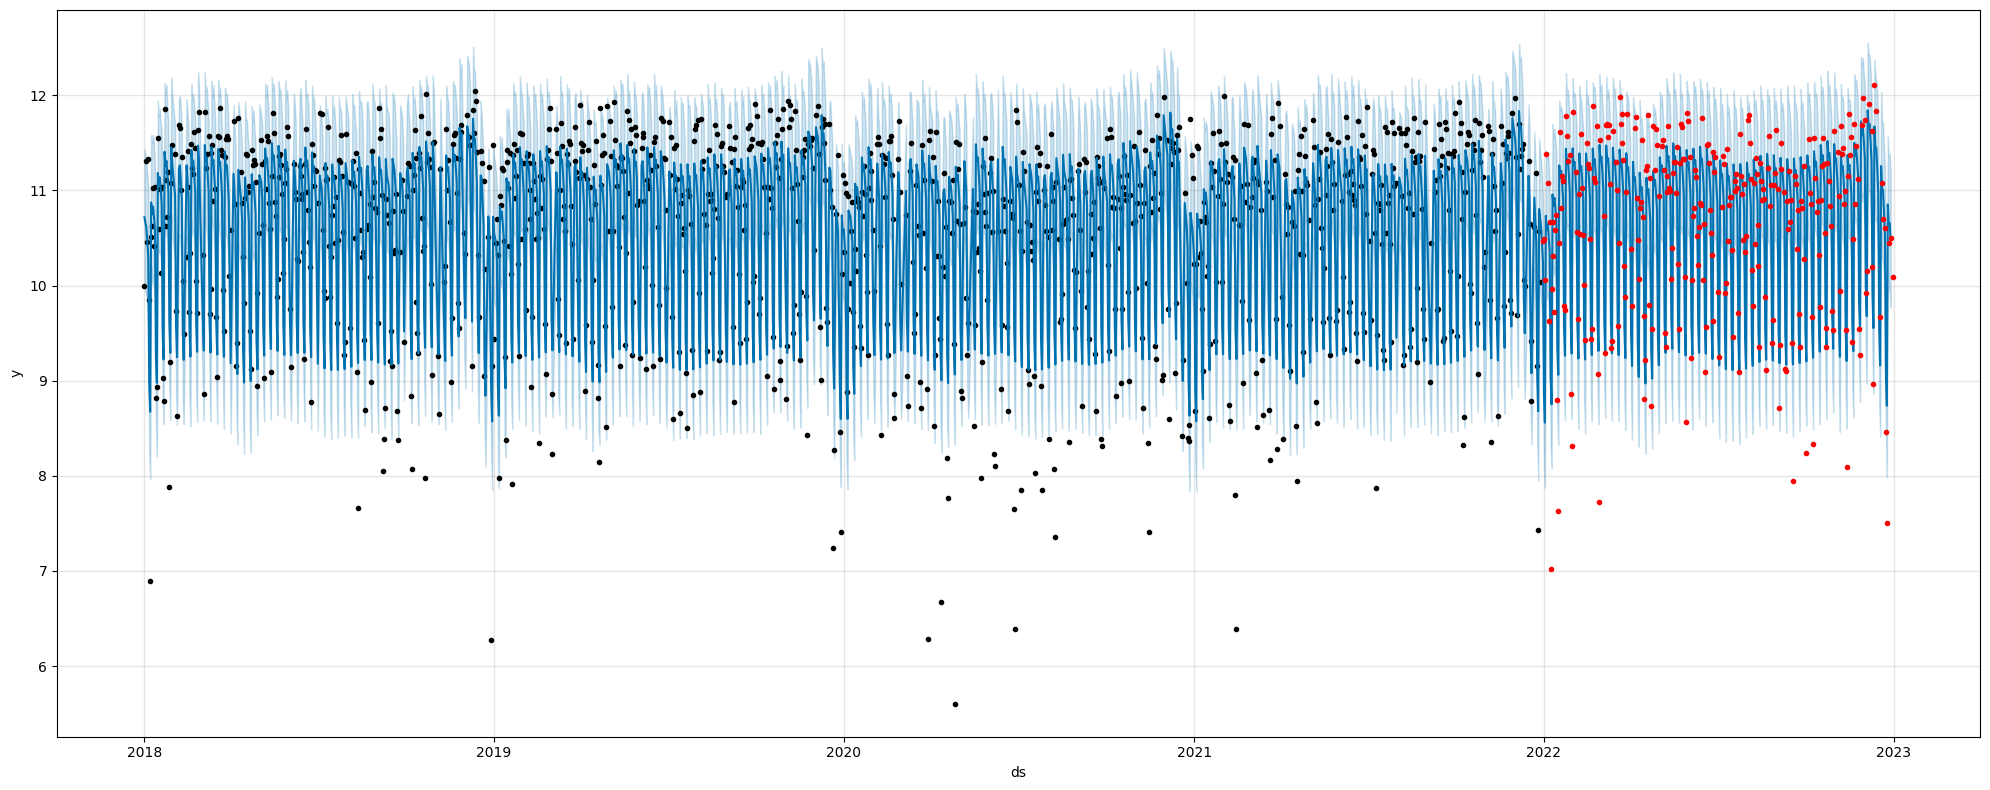

In [51]:
modelo_prophet.plot(previsao_sem_outliers, figsize=(20,8))
plt.plot(teste_sem_outliers['ds'], teste_sem_outliers['y'], '.r')

Após aplicar o ***log(x)***, apereceram ainda novos outliers, mas esses não são um problema dado que já tratamos os dados antes. Além do mais, vemos que aparentemente o modelo se adaptou um pouco melhor aos dados.

Vamos avaliar o modelo novamente e ver o que conseguimos.

In [52]:
previsao_antes_sem_outliers = previsao_sem_outliers.copy()

previsao_antes_sem_outliers = previsao_antes_sem_outliers.query(' ds < "2022-01-01"')

In [53]:
valor_real_antes_sem_outliers = treino_sem_outliers.copy()

valor_real_antes_sem_outliers = valor_real_antes_sem_outliers.query('ds < "2022-01-01"')

In [54]:
previsao_antes_sem_outliers = previsao_antes_sem_outliers.merge(valor_real_antes_sem_outliers, how='left', on='ds').dropna()

In [55]:
valor_real_antes_sem_outliers['y'] = np.exp(valor_real_antes_sem_outliers['y'])
previsao_antes_sem_outliers['yhat'] = np.exp(previsao_antes_sem_outliers['yhat'])

print('RMSE: ', np.sqrt(mean_squared_error(valor_real_antes_sem_outliers['y'],previsao_antes_sem_outliers['yhat'])))
print('MAPE: ', mean_absolute_percentage_error(valor_real_antes_sem_outliers['y'],previsao_antes_sem_outliers['yhat']))

RMSE:  23440.031271949003
MAPE:  0.5461537064496369


Conseguimos uma melhora significativa em nossos resultados. O **RMSE** chegou a 23,4 mil reais de erro e o **MAPE** caiu de 104% para 55%, aproximadamente. Apesar de não ser um resultado satisfatório é comum que esses resultados em modelos baseados em Prophet.

In [56]:
previsao_2022_sem_outliers = previsao_sem_outliers.copy()

previsao_2022_sem_outliers = previsao_2022_sem_outliers.query('ds >= "2022-01-01"')

In [57]:
previsao_2022_sem_outliers = previsao_2022_sem_outliers.merge(teste_sem_outliers, how='left', on='ds').dropna()
previsao_2022_sem_outliers = previsao_2022_sem_outliers.drop('y', axis=1)

teste_sem_outliers = teste_sem_outliers.merge(previsao_2022_sem_outliers, how='left', on='ds').dropna()

In [58]:
teste_sem_outliers['y'] = np.exp(teste_sem_outliers['y'])
previsao_2022_sem_outliers['yhat'] = np.exp(previsao_2022_sem_outliers['yhat'])

print('RMSE: ', np.sqrt(mean_squared_error(teste_sem_outliers['y'],previsao_2022_sem_outliers['yhat'])))
print('MAPE: ', mean_absolute_percentage_error(teste_sem_outliers['y'],previsao_2022_sem_outliers['yhat']))

RMSE:  23771.586813366015
MAPE:  0.4342492002069842


Mais uma vez conseguimos resultados melhores para os dados de teste. O **RMSE** teve valor na casa dos 23,7 mil reais em erro e o **MAPE** chegou ao seu melhor valor, como sendo 43%.

Vemos ainda sim não é menor que 10 mil reais e 30%, como nós gostaríamos que fosse, muito provavelmente deve-se ao fato da natureza dos dados. Como bem sabemos, os dados forma tirados do **CEAPS**, dados esse que falam os gastos gerados por senadores que, por sí só, tem uma natureza não sazonal. Não podemos dizer quanto os senadores vão gastar no dia a dia, assim como vimos nos gráficos de linha no começo, e por isso modelos como o Prophet, que são baseados na sazonalidade, não vão conseguir se adaptar bem a eles.

Concluímos que para os dados que temos sim o modelo performou melhor ao retirar os outliers e reduzir a escala dos dados. Com isso treinaremos novamente o modelo e preveremos quanto será o gasta no primeiros 30 dias de 2023.

In [59]:
np.random.seed(400)

modelo_prophet = Prophet(yearly_seasonality=True, growth='flat', seasonality_prior_scale=0.1)

In [60]:
sem_outliers['y_real'] = sem_outliers['y']
sem_outliers['y'] = np.log(sem_outliers['y'])

/tmp/ipykernel_943/2956536773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_outliers['y_real'] = sem_outliers['y']
/tmp/ipykernel_943/2956536773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_outliers['y'] = np.log(sem_outliers['y'])


In [61]:
modelo_prophet.fit(sem_outliers)

futuro = modelo_prophet.make_future_dataframe(periods=90, freq='D')

previsao_sem_outliers = modelo_prophet.predict(futuro)

16:42:47 - cmdstanpy - INFO - Chain [1] start processing
16:42:47 - cmdstanpy - INFO - Chain [1] done processing


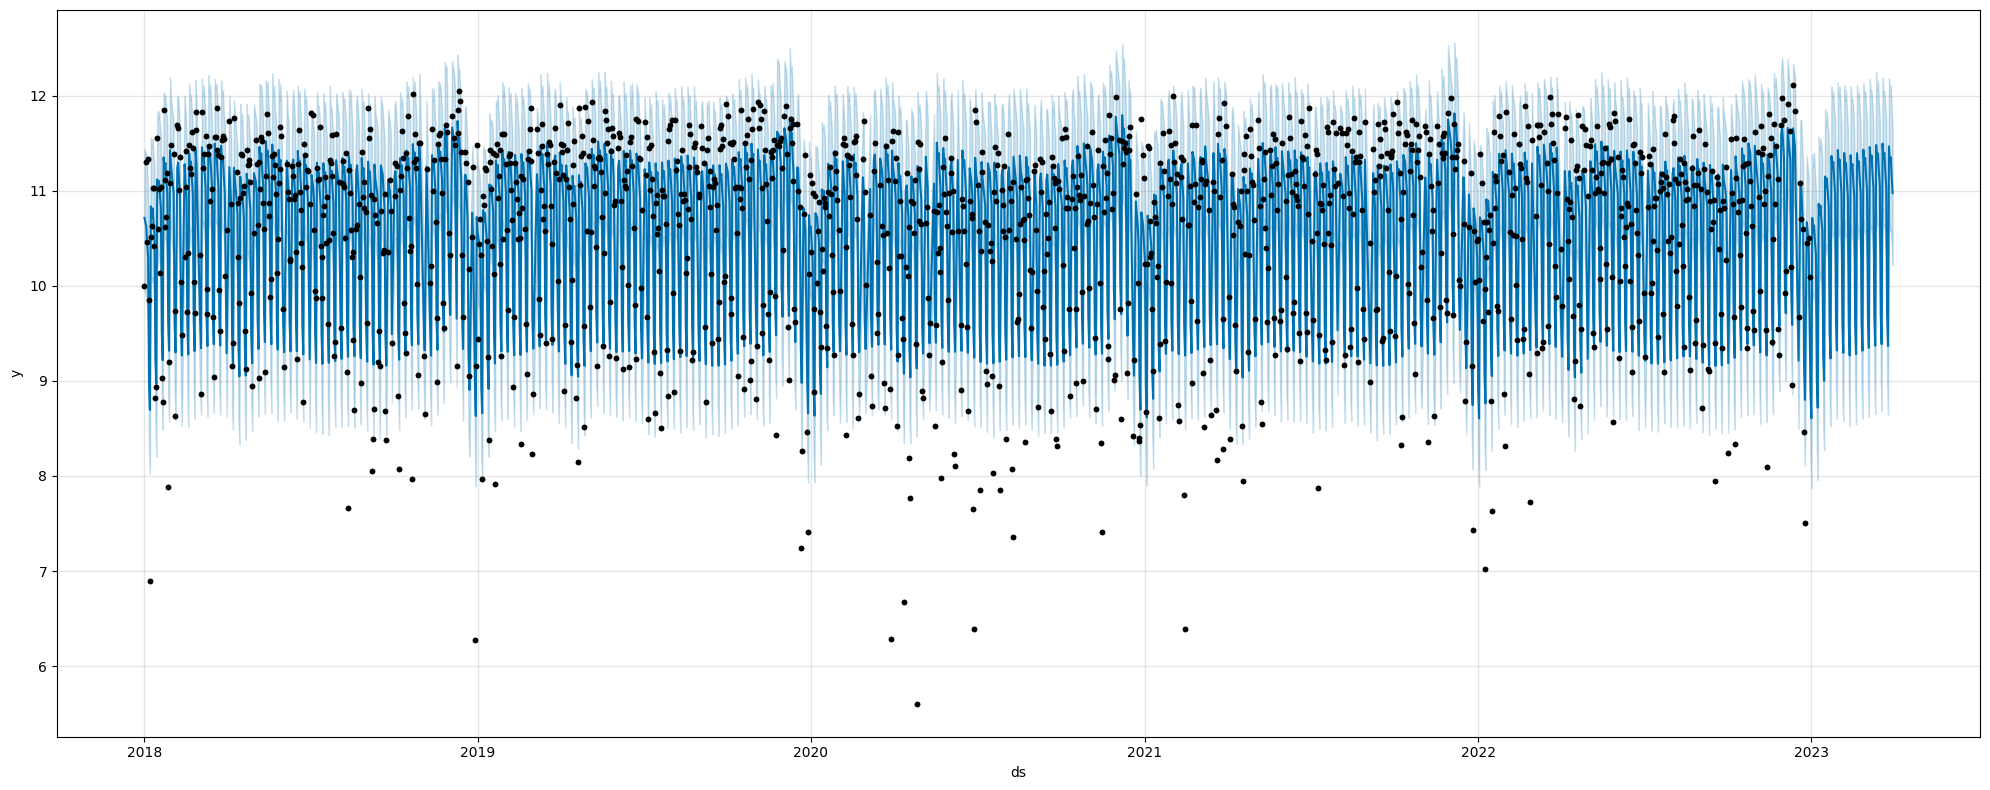

In [62]:
modelo_prophet.plot(previsao_sem_outliers, figsize=(20,8))

plt.plot(sem_outliers['ds'], sem_outliers['y'], '.k')

In [63]:
previsao_2023 = previsao_sem_outliers.query('ds >= "2023-01-01"')

previsao_2023['yhat'] = np.exp(previsao_2023[['yhat']])

/tmp/ipykernel_943/1713277858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao_2023['yhat'] = np.exp(previsao_2023[['yhat']])


/tmp/ipykernel_943/3518707300.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.yaxis.set_ticklabels([0, 20, 40, 60, 80, 100], fontsize=13)


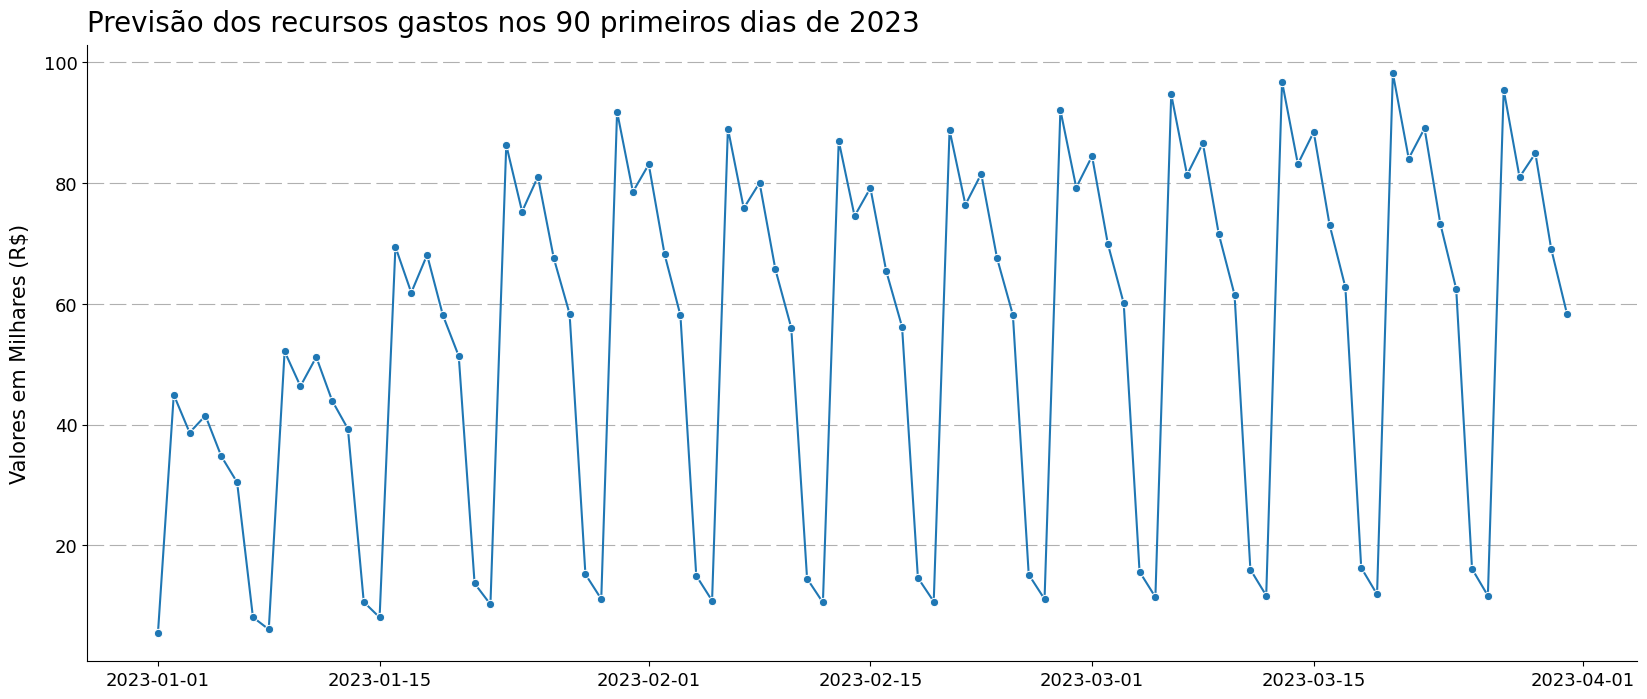

In [64]:
fig, ax = plt.subplots(figsize=(20,8))

ax = sns.lineplot(x=previsao_2023['ds'], y=previsao_2023['yhat'], marker='o')

ax.set_title('Previsão dos recursos gastos nos 90 primeiros dias de 2023', loc='left', fontsize=20, pad=10)

ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=13)

ax.set_ylabel('Valores em Milhares (R$)', fontsize=15, labelpad=10)
ax.yaxis.set_ticklabels([0, 20, 40, 60, 80, 100], fontsize=13)
ax.yaxis.grid(linestyle=(0,(15,5)))

sns.despine()

Sendo este o nosso resultado, com uma tendência a aumentar ao longo dos dias com várias quedas sazonalmente.

Você pode utilizar esse modelo para tentar prever quais serão os gastos nesses dias, mas lembre-se que estará cometendo um erro médio de até 23,7 mil reais, com um erro absoluto médio de até 43%.